In [1]:
%pylab inline
plt.rcParams['figure.figsize'] = (8, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve

In [1]:
k, H, n, tc = 2.5, 0, 100, 35000

In [2]:
x = linspace(0, tc, n)  # pozice uzlu
dx = tc / (n - 1)       # vzdalenost uzlu
d = ones(n)
# matice soustavy
A = spdiags([d, -2*d, d], [-1, 0, 1], n, n, 'csr')
b = -d * H * dx**2 / k
# Okrajove podminky
Tl = 0
A[0, :2] = [1, 0]
b[0] = Tl
A[-1, -2:] = [2, -2]

NameError: name 'linspace' is not defined

In [3]:
mq = np.linspace(0.02, 0.1, 20)
sq = []
for q in mq:
    b[-1] = -H * dx**2 / k - 2 * q * dx / k # Uprav Neumannovu okr. podminku pro aktualni hodnotu q
    t = spsolve(A, b)
    sq.append(1000 * k * (t[1] - t[0]) / dx) # uloz hodnotu tep. toku na povrchu

NameError: name 'np' is not defined

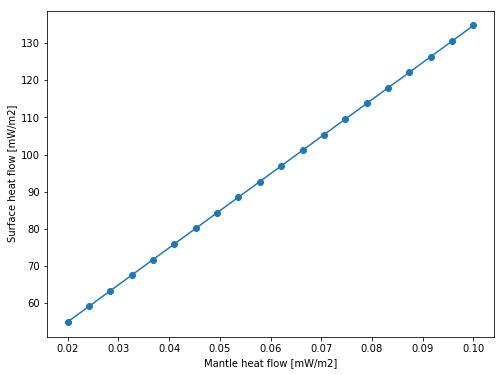

In [6]:
plot(mq, sq, 'o-')
xlabel('Mantle heat flow [mW/m2]')
ylabel('Surface heat flow [mW/m2]');